(lecture14:homework)=
# Homework 14

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

```{note}
+ Please match all the pages corresponding to each of the questions when you submit on gradescope.
```

## Student details

+ **First Name:**
+ **Last Name:**
+ **Email:**

In [8]:
MAKE_BOOK_FIGURES=False

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)


def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

import numpy as np
import scipy.stats as st
import pandas as pd

## Problem 1 - Joint probability mass function, covariance, and correlation

In this problem you will perform some analytical calculations that demonstrate further the concept of the joint probability mass (density) function (see [Lecture 13](lecture13:joint-probability-density-function).

Consider two random variables $X$ and $Y$ taking discrete values in $\{0,1\}$.
The joint probability mass function $p(x,y)$ is given by:

$$
p(X = 0, Y = 0) = 0.1,
$$

$$
p(X = 1, Y=0) = 0.2,
$$

$$
p(X = 0, Y = 1) = 0.2,
$$

and

$$
p(X = 1, Y = 1) = 0.5.
$$

For your convenience, I have put these numbers in a 2 x 2 matrix:

In [2]:
A = np.array([[0.1, 0.2],
              [0.2, 0.5]])

+ Verify that the sum of all entries in `A` is one, i.e., verify that $\sum_{x,y} p(x,y) = 1$.

In [ ]:
# Your code here

+ What is the probability mass function of $Y$? Hint: Use the marginalization property,

$$
p(Y = y) = \sum_{x} p(x, Y = y) = p(X=0, Y = y) + p(X=1, Y = y),
$$

to find $p(Y=y)$ for $y=0$ and $1$.

In [ ]:
# Your code/text here

+ What is the probability mass function of $X$? Hint: Same as above if you swap $x$ and $y$.

In [ ]:
# Your code/text here

+ What is the expectation of $X$?

In [ ]:
# Your code/text here

+ What is the expectation of $Y$?

In [ ]:
# Your code/text here

+ What is the variance of $X$?

In [ ]:
# Your code/text here

+ What is the variance of $Y$?

In [ ]:
# Your code/text here

+ What is the covariance of $X$ and $Y$?

In [ ]:
# Your code/text here

+ What is the correlation of $X$ and $Y$?

In [ ]:
# Your code/text here

+ What is the covariance of $X$ with itself? Hint: Use the definition of covariance.

In [ ]:
# Your code/text here

+ What is the covariance of $3X$ with $Y$? Hint: Use the definition of covariance.

In [ ]:
# Your code/text here

+ What is the covariance of $X$ with 0.31? Yes, the constant 0.31. Hint: Use the definition of covariance for $Y=0.31$. You will need the mean of the constant. What is the mean of a constant?

In [ ]:
# Your code/text here

## Problem 2 - Estimating the mechanical properties of a plastic material from molecular dynamics simulations

First, download the dataset `stress_strain.txt` from [this](https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-239-intro-to-data-science/master/data/stress_strain.txt) URL.

In [2]:
url = 'https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-239-intro-to-data-science/master/data/stress_strain.txt'
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35224  100 35224    0     0    98k      0 --:--:-- --:--:-- --:--:--   98k


Let's load the data:

In [3]:
data =  pd.read_csv('stress_strain.txt', delimiter='\t', names=['Strain', 'Stress'], skiprows=1)
data.round(3)

,Strain,Stress
0,0.000,-29.490
1,0.000,11.780
2,0.001,45.195
3,0.001,49.495
4,0.001,42.283
...,...,...
996,0.251,115.897
997,0.251,125.219
998,0.251,118.189
999,0.251,142.209


The dataset was generated using a molecular dynamics simulation of a plastic material (thanks to Professor Alejandro Strachan for sharing the data!). 
This is a simulated version of the real experiment we saw in [Homework 5](lecture05:homework).
Specifically, Strachan's group did the following:

+ They took a rectangular chunk of the material and marked the position of each one of its atoms;
+ They started applying a tensile force along one dimension. The atoms are coupled together through electromagnetic forces and they must all satisfy Newton's law of motion.
+ For each value of the applied tensile force they marked the `Stress` (force be unit area) in the middle of the materail and the corresponding `Strain` of the material (percent elongation in the pulling direction).
+ Eventually the material entered the plastic regime and then it broke.

Here is a visualization of the data:

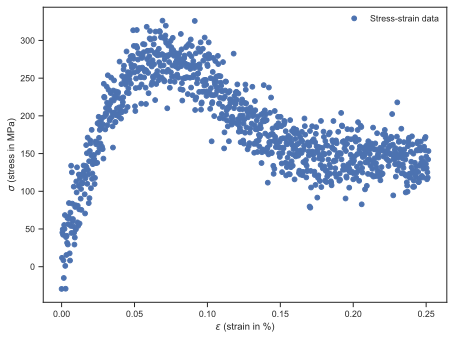

In [9]:
fig, ax = make_full_width_fig()
ax.plot(data['Strain'], data['Stress'], 'o', label='Stress-strain data')
plt.xlabel('$\\epsilon$ (strain in %)')
plt.ylabel('$\\sigma$ (stress in MPa)')
plt.legend(loc='best')
save_for_book(fig, 'ch14.fig6')

Note that for each particular value of the strain, you don't necessarily get a unique stress.
This is because in molecular dynamics the atoms are jiggling around due to thermal effects.
So there is always this "jiggling" noise when you are trying to measure the stress and the strain.
We would like to process this noise in order to extract what is known as the [stress-strain curve](https://en.wikipedia.org/wiki/Stress–strain_curve) of the material.
The stress-strain curve is a macroscopic property of the the material which is affeted by the fine structure, e.g., the chemical bonds, the crystaline structure, any defects, etc.
It is a required input to mechanics of materials.

The very first part of the stress-strain curve should be linear.
It is called the *elastic regime*.
In that region, say $\epsilon < \epsilon_l=0.04$, the relationship between stress and strain is:
$$
\sigma(\epsilon) = E\epsilon.
$$
The constant $E$ is known as the *Young modulus* of the material.
Assume that you measure $\epsilon$ without any noise, but your measured $\sigma$ is noisy.

First, extract the relevant data for this problem, split it into training and validation datasets, and visualize the training and validation datasets using different colors.

In [6]:
# The point at which the stress-strain curve stops being linear
epsilon_l = 0.04
# Relevant data (this is nice way to get the linear part of the stresses and straints)
data_linear = data[data['Strain'] < 0.04]
data_nonlinear = data[data['Strain'] >= 0.04]

Let's visualize this to make sure that we have split the data correctly:

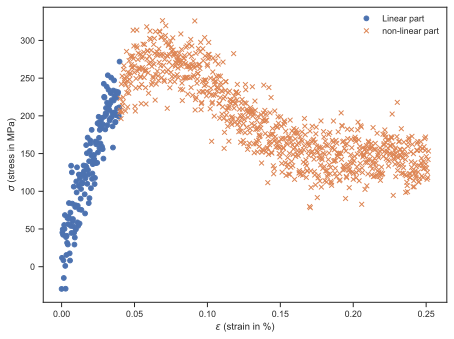

In [10]:
fig, ax = make_full_width_fig()
ax.plot(data_linear['Strain'], data_linear['Stress'], 'o', label='Linear part')
ax.plot(data_nonlinear['Strain'], data_nonlinear['Stress'], 'x', label='non-linear part')
plt.xlabel('$\\epsilon$ (strain in %)')
plt.ylabel('$\\sigma$ (stress in MPa)')
plt.legend(loc='best')
save_for_book(fig, 'ch14.fig7')

+ Find the empirical correlation between `Strain` and `Stress` in the linear regime.

In [ ]:
rho_linear = # Your code here
print(f'rho_linear = {rho_linear:1.2f}')

+ Find the empirical correlation between `Strain` and `Stress` in the nonlinear regime.

In [ ]:
rho_nonlinear = # Your code here
print(f'rho_nonlinear = {rho_nonlinear:1.2f}')

+ Find the empirical mean of the `Strain` in the linear regime:

In [ ]:
mu_strain_linear = # Your code here
# print something

+ Find the standard deviation of the `Strain` in the linear regime:

In [ ]:
sigma_strain_linear = # Your code here
# print something

+ Find the empirical mean of the `Stress` in the linear regime:

In [ ]:
mu_stress_linear = # Your code here
# print something

+ Find the standard deviation of the `Stress` in the linear regime:

In [ ]:
sigma_stress_linear = # Your code here
# print something

+ In the linear regime, fit the following model:
    
$$
\sigma(\epsilon) = a\epsilon + b.
$$

In this model, $\hat{a}$ will be your estimate of the Young's modulus $E$ of the material.

Hint: Use the formulas for $\hat{a}$ and $\hat{b}$ that we derived in [Linear Regression with One Variable](lecture14:linear-regression-with-one-variance).

In [ ]:
a = # Your code here
b = # Your code here
# print something

+ Theoretically, $b$ should be excactly zero. If you get a non-zero value, where do you think this is coming from?

**Answer:**

*Your answer here.*

+ In the same figure, plot the data from the linear regime along with the predictions of the fitted model $\sigma(\epsilon) = \hat{a}\epsilon + \hat{b}$.

In [ ]:
# Your code here

Run the following code to convert the notebook to a pdf. Verify that the file path to the notebook is correct.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!apt-get install inkscape texlive texlive-xetex texlive-latex-extra pandoc --quiet
!pip install pypandoc --quiet
!jupyter nbconvert --to PDF '/content/drive/MyDrive/Colab Notebooks/Copy of homework_14.ipynb'